# A/B Testing

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use('default')

## Background

Data scientists often need to conduct experiments about user interface and product marketing. It's designed to test the hypothesis in such a way that it hopefully will deliver conclusive results. For example, a new interface B is better than the existing interface A. **Treatment** is something that a test is applied, such as interfaces, products, prices. **Control group** group is a standard, existing, without-new-things group, and **treatment group** is a group with a specific thing that we wanna test. **Subjects** are typically users like web visitors or patients that are exposed to treatments. Having a control group gives us assurance that all other things are equal and that any difference is due to the treatment or to chance. **A/B testing** is common in web design, marketing, and ecommerce such as web page desing, price of a product, wording of a headline. 

The outcomes that A/B testing typically measures are

- Number of clicks
- Number of purchases
- Duration of web page visits
- Number of pages visited
- Whether a particular page is visited

## Hypothesis test

Something the A/B testing typically constructs. In A/B testing, when we see difference between A and B, we think it's due to either random chance or true difference. Hypothesis test gives us the assessment whether random chance is a reasonable explanation.

A/B testing typically uses **one-way** hypothesis test (**one-tail** hypothesis test), in which we make decision that one option is assigned as default unless the other option proves better.

## Researcher bias

Selecting a test static after the experiment. But a test static needs to be established beforehand.

## Multi-arm bandit

If the number of experiments gets more than 2, for example, out of price A, B, C and B, which is the best, the experimental design is called **multi-arm bandit**.

## Statistical significance

- 1 minus p-value
- The sufficient level of statistical significance depends on how much false positive you can have
- If statistical significance is 80%, it means that 1 false positive out of 5 tests
- If 95%, 1 out of 20
- If 100%, 1 out of 100

## Sample size

- Effect size is the minimum size of the effect that you hope to be able to detect in a statistical test, such as 20% improvement in click rates
- Power is the probability of detecting a specified effect size with specified sample size and variability.
- Standard approach is to predefine the effect size, and then drives the sample size
- Statistical software can use sample size, effect size, significance level and power. Specify any three of them, and the fourth can be calculated. So if we wanna know the sample size, we can compute it if we have the effect size, significance level and power.

## Resampling permutation procedure

- Shuffle group A and B to produce distribution and compare our test statistic to the distribution.

## Random permutation test (Randomization test)

Permute means to change the order of a set of values.

Combine two or more groups of samples together and randomly reallocate the groups to the resampled data. People also call it randomization test, random permutation test, or exact test. Permute means to change the order of a set of values. The goal is to compare the observed test statistic and the many test statistics which are obtained the permutations. If the observed test statistic lies outside most of the permutation distribution, statistically significant.

Sample without replacement.

Assumption about normally distributed data is not needed.

Creating a distribution from resampling is to have the reference null hypothesis distribution from the data like t-test.

## Bootstrap permutation test

The above approach by using sample with replacement

In [11]:
df = pd.read_csv('../data/web_page_data.csv')

In [15]:
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [16]:
df.tail()

,Page,Time
31,Page A,0.74
32,Page A,0.86
33,Page A,1.18
34,Page A,2.06
35,Page A,0.93


In [14]:
df.groupby(['Page']).describe()

Time                                                   
       count      mean       std   min   25%   50%    75%   max
Page                                                           
Page A  21.0  1.263333  0.884632  0.21  0.67  0.95  1.730  3.42
Page B  15.0  1.620000  1.011364  0.43  0.80  1.47  2.345  3.57

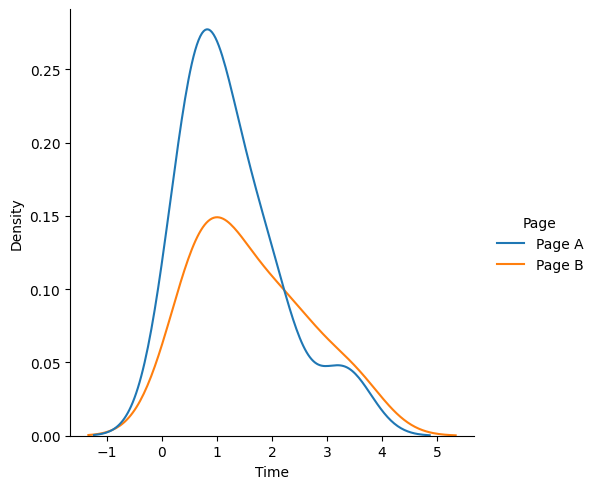

In [12]:
sns.displot(
    df,
    x='Time',
    hue='Page',
    kind='kde'
)
plt.show()

In [25]:
mean_a = df.loc[df['Page'] == 'Page A', 'Time'].mean()
mean_b = df.loc[df['Page'] == 'Page B', 'Time'].mean()

observed_difference = mean_b - mean_a

print(f'Observed difference: {observed_difference}')

Observed difference: 0.3566666666666669


In [21]:
def permute_and_compute_difference(df, n_a, n_b):
    # Assumes dataframe has index from 0 to n - 1
    indices = [i for i in range(n_a + n_b)]
    index_b = set(random.sample(indices, n_b))
    index_a = set(indices) - index_b
    mean_a = df.loc[index_a, 'Time'].mean()
    mean_b = df.loc[index_b, 'Time'].mean()
    return mean_b - mean_a


n_a = len(df.loc[df['Page'] == 'Page A'])
n_b = len(df.loc[df['Page'] == 'Page B'])
num_sampling = 1000
permuted_differences = []

for _ in range(num_sampling):
    
    difference = permute_and_compute_difference(df, n_a, n_b)
    permuted_differences.append(difference)

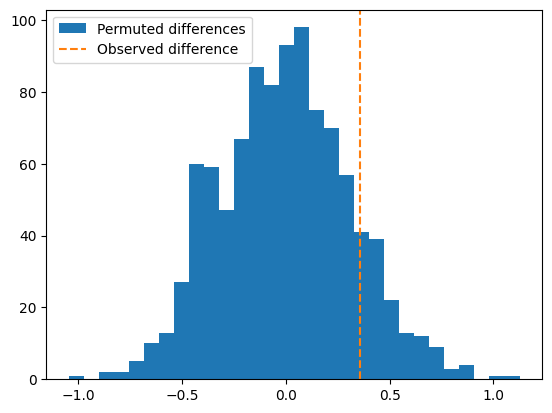

In [28]:
plt.hist(
    permuted_differences, 
    bins=30,
    label='Permuted differences'
)
plt.axvline(
    observed_difference,
    color='tab:orange',
    linestyle='--',
    label='Observed difference'
)
plt.legend()
plt.show()

In [34]:
p_value = np.mean(observed_difference < permuted_differences)

print(p_value)

0.129


## p-value

The probability that results as extreme as the observed results might occurr, given a null hypothesis model.

Given a chance model, what is the probability of a result this extreme?

The proportion of times that the permutation test produces a difference equal to or greater than the observed difference.

The wrong interpretation of p-value is the probability that the result is due to chance.

## Type 1 error

Mistakenly concluding an effect is real when it is due to chance. 

False positive

We typically try to minimize Type 1 error because we don't wanna be fooled by random chance.

As we run multiple testing, it increases the probability of making a type 1 error. This is called **alpha inflation**.

When $\alpha$ is the probability that falsely test is significant, $(1 - \alpha)$ is the probability that correctly test is not significant. When we run $n$ tests and all are correctly tested as non-significant, the probability is $(1 - \alpha)^n$. So the probability that at least one test will falsely test significant is $1 - (1 - \alpha)^n$. When $\alpha = 0.05$ and $n = 20$, 

$$
1 - (1 - 0.05)^{20}
$$
$$
= 1 - 0.95^{20}
$$
$$
= 1 - 0.36
$$
$$
= 0.64
$$

So the probability of making at least one type 1 error in multiple testing is high.

## Bonferroni adjustment

Divide alpha by the number of multiple test, $\frac{\alpha}{n}$.

## Tukey's HSD

Tukey's honest significant difference is another approach for multiple tests

## Type 2 error

Mistakenly concluding an effect is due to chance when it is real. This could happen becuase the sample size is too small to detect the effect. In such case, it could be that a larger sample would yield a smaller p-value.

False negative

## Multiple testing

- Boferroni
- F test
- Multi-arm bandit

## Compute sample size

- Effect size
- Power, probability of detecting the effect size
- Significance level alpha

## Churn rate

The rate at which customers stop doing business with a company,  or stop subscribing to a service.

## Reference

- O'REILLY Practical Statistics for Data Scientist, 50+ Essential Concepts Using R and Python
- [How to A/B Test Your Pricing (And Why It Might Be a Bad Idea)](https://blog.hubspot.com/marketing/price-testing)
- [Common Mistakes During A/B Testing](https://towardsdatascience.com/common-mistakes-during-a-b-testing-bdb9eefdc7f0)